In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [2]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [3]:
iris = load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
pca = PCA(n_components = 2)
X2 =pca.fit_transform(X)

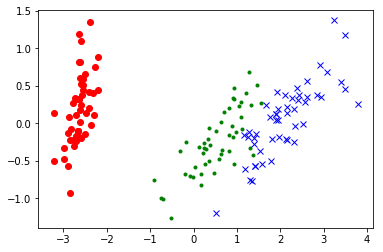

In [5]:
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"g.")
plt.plot(X2[y==2,0], X2[y==2,1],"bx")

In [6]:
X_scaled = preprocessing.scale(X)

X_scaled.mean(axis=0),X_scaled.std(axis=0)
print(X_scaled.shape)

(150, 4)


In [7]:
clf = KNeighborsClassifier(n_neighbors=1)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [8]:
scores = cross_val_score(clf, X_scaled, y, cv=10)
print(scores)

[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.8        1.         1.         1.        ]


In [9]:
y_perd = cross_val_predict(clf, X_scaled, y, cv=10)

In [10]:
print(confusion_matrix(y, y_perd))
print(y.shape)

[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
(150,)


In [28]:
con = confusion_matrix(y, y_perd)


In [30]:
sTP,sFP = con[0,0],con[1,0]+con[2,0]
sFN = con[0,1]+con[0,2]
sTN = con[1,1]+con[1,2]+con[2,1]+con[2,2]

vTP,vFP = con[1,1], con[0,1]+con[2,1]
vFN = con[1,0] + con[1,2]
vTN = con[0,0] + con[0,2] + con[2,0] + [2,2]

viTP,viFP = con[2,2],con[0,2]+con[1,2]
viFN = con[2,0] + con[2,1]
viTN = con[0,0]+con[1,0]+con[1,0]+con[1,1]
def prediction(TP,FP,TN,FN,name):
    pre = TP/(TP+FP)
    rec = TP/(TP+FN)
    f1 = 2*(pre*rec)/(pre+rec)
    print(name)
    print("Precision",pre)
    print("Recall",rec)
    print("F1",f1)
prediction(sTP,sFP,sTN,sFN,"setosa")
prediction(vTP,vFP,vTN,vFN,"versicolour")
prediction(viTP,viFP,viTN,viFN,"virginica")

    

setosa
Precision 1.0
Recall 1.0
F1 1.0
versicolour
Precision 0.9215686274509803
Recall 0.94
F1 0.9306930693069307
virginica
Precision 0.9387755102040817
Recall 0.92
F1 0.9292929292929293


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y, y_perd, average=None))
print(recall_score(y,y_perd,average=None))
print(f1_score(y, y_perd, average=None))

[1.         0.92156863 0.93877551]
[1.   0.94 0.92]
[1.         0.93069307 0.92929293]
